In [4]:
import pandas as pd 

In [7]:
dates= ['2020-01-01','2020-03-01','2020-09-01']
dates

['2020-01-01', '2020-03-01', '2020-09-01']

In [27]:
#변수 ts_dates사용
# to_dates : list 형태 문자열 데이터만 가능 
# '2020-01-01' , '2020/01/01' , '2020.01.01' , '20200101' 다 가능 
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2020-09-01'], dtype='datetime64[ns]', freq=None)

In [11]:
type(ts_dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
pr_day = ts_dates.to_period(freq='D')
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2020-09-01'], dtype='period[D]')

In [15]:
pr_month = ts_dates.to_period(freq='M')
pr_month

PeriodIndex(['2020-01', '2020-03', '2020-09'], dtype='period[M]')

In [17]:
pr_year = ts_dates.to_period(freq='Y')
pr_year

PeriodIndex(['2020', '2020', '2020'], dtype='period[A-DEC]')

In [143]:
file_path ='./data/timeseries.csv'
df = pd.read_csv(file_path)
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [94]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

KeyError: 'Date'

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


In [45]:
# new_Date 컬럼에서 데이터 0번째 값 가지고 오기
df['new_Date'][0]

Timestamp('2015-07-02 00:00:00')

In [46]:
df['new_Date'].iloc[0]

Timestamp('2015-07-02 00:00:00')

In [47]:
df['new_Date'].loc[0]

Timestamp('2015-07-02 00:00:00')

In [78]:
# Date 컬럼을 삭제하고 메모리 반영해주세요
df.drop('Date', axis=1,inplace=True)

In [72]:
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


In [ ]:
# new_Date 컬럼을 index로 지정해주세요 

In [79]:
df.set_index('new_Date',inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


In [81]:
# 날짜를 인덱스로 가지는 데이터 : 시계열 데이터
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


In [82]:
dates = ['2020-01-01','2020-03-01','2020-09-01']
dates

['2020-01-01', '2020-03-01', '2020-09-01']

In [84]:
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2020-09-01'], dtype='datetime64[ns]', freq=None)

In [85]:
# 기간 설정
# 연도 기준으로 1씩 증가되는 6개의 값 추출 
timestamp_df=pd.date_range(start = '2020-01-01',
                           end = None,
                           periods=6,
                           freq='Y',
                           tz = 'Asia/Seoul')
timestamp_df

DatetimeIndex(['2020-12-31 00:00:00+09:00', '2021-12-31 00:00:00+09:00',
               '2022-12-31 00:00:00+09:00', '2023-12-31 00:00:00+09:00',
               '2024-12-31 00:00:00+09:00', '2025-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='A-DEC')

In [87]:
pr_y = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='2Y',
                       )
pr_y

PeriodIndex(['2020', '2022', '2024', '2026', '2028'], dtype='period[2A-DEC]')

In [89]:
pr_m = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='M',
                       )
pr_m

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05'], dtype='period[M]')

In [90]:
pr_d = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='D',
                       )
pr_d

PeriodIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
             '2020-01-05'],
            dtype='period[D]')

In [91]:
pr_h = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='H',
                       )
pr_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00',
             '2020-01-01 03:00', '2020-01-01 04:00'],
            dtype='period[H]')

In [92]:
pr_min = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='MIN',
                       )
pr_min

PeriodIndex(['2020-01-01 00:00', '2020-01-01 00:01', '2020-01-01 00:02',
             '2020-01-01 00:03', '2020-01-01 00:04'],
            dtype='period[T]')

In [93]:
pr_sec = pd.period_range(start = '2020-01-01',
                       end = None,
                       periods=5,
                       freq='S',
                       )
pr_sec

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
             '2020-01-01 00:00:02', '2020-01-01 00:00:03',
             '2020-01-01 00:00:04'],
            dtype='period[S]')

In [106]:
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [113]:
no_date_df = df.copy()
#Date 컬럼 삭제하기
no_date_df = no_date_df.drop('Date',axis=1)
no_date_df

,Close,Start,High,Low,Volume
0,10100,10850,10900,10000,137977
1,10700,10550,10900,9990,170253
2,10400,10900,10950,10150,155769
3,10900,10800,11050,10500,133548
4,10800,10900,11000,10700,63039


In [115]:
date_df = df.copy()
date_df
#그대로 유지

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [145]:
newdt_df = df.copy()
# new_Date 컬럼을 생성후, Date 데이터를 이용해서 날짜타입으로 변환후 넣기 
# Date 컬럼 삭제하기 
newdt_df['new_Date'] = pd.to_datetime(newdt_df['Date'])
newdt_df = newdt_df.drop('Date',axis=1)
newdt_df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


In [127]:
s = '2020-06-12'
print(s[0:4])
print(s[5:7])
print(s[8:])
date_df['Date'][0:2] # 행의 갯수 

2020
06
12


0    2015-07-02
1    2016-06-29
Name: Date, dtype: object

In [ ]:
# date_df 데이터를 이용해서 년(4자리), 월(1 or 2자리),일(1 or 2 자리 )
# 컬럼을 만들고 각 년/월/일 데이터를 넣어주세요 

In [124]:
# object 문자열로 있을때 년 월 일 추출하기 
date_df['년']= date_df['Date'].str[:4]
date_df['월']= date_df['Date'].str[5:7]
date_df['일']=date_df['Date'].str[-2:]
date_df

,Date,Close,Start,High,Low,Volume,년,월,일
0,2015-07-02,10100,10850,10900,10000,137977,2015,07,02
1,2016-06-29,10700,10550,10900,9990,170253,2016,06,29
2,2017-06-28,10400,10900,10950,10150,155769,2017,06,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,06,27
4,2019-06-26,10800,10900,11000,10700,63039,2019,06,26


In [ ]:
# newdt_df 데이터를 이용해서 년(4자리), 월(1 or 2자리),일(1 or 2 자리 )
# 컬럼을 만들고 각 년/월/일 데이터를 넣어주세요 

In [121]:
# datetime 형식일때 년 월 일 추출하기
newdt_df['년'] = newdt_df['new_Date'].dt.year
newdt_df['월'] = newdt_df['new_Date'].dt.month
newdt_df['일'] = newdt_df['new_Date'].dt.day
newdt_df

,Close,Start,High,Low,Volume,new_Date,년,월,일
0,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [159]:
# 월 컬럼에 2자리 맞춰주기 위해서 사용한 코드
# 정수 형태로 들어가 있기 때문에 문자열로 바꿔주고 zfill 함수 사용해서 2자리 맞춰줄수있다.
newdt_df['월'] = (newdt_df['new_Date'].dt.month.astype(str)).str.zfill(2)
newdt_df

,Close,Start,High,Low,Volume,new_Date,년,년-월,년-월-일,월
0,10100,10850,10900,10000,137977,2015-07-02,2015,2015-07,2015-07-02,07
1,10700,10550,10900,9990,170253,2016-06-29,2016,2016-06,2016-06-29,06
2,10400,10900,10950,10150,155769,2017-06-28,2017,2017-06,2017-06-28,06
3,10900,10800,11050,10500,133548,2018-06-27,2018,2018-06,2018-06-27,06
4,10800,10900,11000,10700,63039,2019-06-26,2019,2019-06,2019-06-26,06


In [ ]:
# 년도, 년-월, 년-월-일 3개의 컬럼 생성하기 

In [158]:
newdt_df['new_Date'].dt.to_period(freq='Y') # new_Date 는 시리즈 이므로 datetime형식으로 먼저 변경해줘야한다 >>.dt << 
newdt_df['new_Date'].dt.to_period(freq='M')
newdt_df['new_Date'].dt.to_period(freq='D')
newdt_df['년'] = newdt_df['new_Date'].dt.to_period(freq='Y')
newdt_df['년-월'] = newdt_df['new_Date'].dt.to_period(freq='M')
newdt_df['년-월-일'] = newdt_df['new_Date'].dt.to_period(freq='D')
newdt_df
#newdt_df['년'] = newdt_df['new_Date'].dt.to_period(freq='Y')


,Close,Start,High,Low,Volume,new_Date,년,년-월,년-월-일
0,10100,10850,10900,10000,137977,2015-07-02,2015,2015-07,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29,2016,2016-06,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28,2017,2017-06,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27,2018,2018-06,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26,2019,2019-06,2019-06-26


In [ ]:
newdt_df = df.copy()
# new_Date 컬럼을 생성후, Date 데이터를 이용해서 날짜타입으로 변환후 넣기 
# Date 컬럼 삭제하기 
newdt_df['new_Date'] = pd.to_datetime(newdt_df['Date'])
newdt_df = newdt_df.drop('Date',axis=1)
newdt_df

In [140]:
newdt_df.set_index('new_Date',inplace=True)

<AxesSubplot:xlabel='new_Date'>

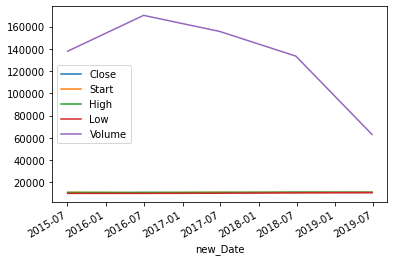

In [141]:
newdt_df.plot()